## 의사결정나무

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 풍속을 threshold 값(기준이 되는 값)에 따라 분리하는 의사결정나무 함수 생성

def binary_tree(data, threshold):
    # 초기화
    yes = []
    no = []
    
    # 데이터로 부터 풍속 값마다 비교하기 위한 반복 문
    
    for wind in data['풍속']:
        # threshold 값과 비교하기 위해 분리
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
            
    # 예측한 결과를 데이터 프레임 형태로 저장
    data_yes = pd.DataFrame({'풍속':yes, '예상 지연 여부': ['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속':no, '예상 지연 여부': ['No']*len(no)})
    
    # data_np 뒤에 data_yes 붙이고, 각각 만들어진 인덱스는 무시하고 붙이기
    return data_no.append(data_yes, ignore_index=True)

# 풍속에 따른 항공지연 데이터 생성
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

In [5]:
data = pd.DataFrame({'풍속':Wind, '지연여부': Delay})
print(data)

    풍속 지연여부
0  1.0   No
1  1.5   No
2  2.5   No
3  5.0  Yes
4  5.5  Yes
5  6.5  Yes


In [6]:
"""
1. binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
   data의 지연 여부와 예상 지연 여부가 같은 값이 나오도록 의사결정나무의 
   결과물을 data_pred에 저장하세요.
"""
data_pred = binary_tree(data, threshold=4)
print(data_pred)

    풍속 예상 지연 여부
0  1.0       No
1  1.5       No
2  2.5       No
3  5.0      Yes
4  5.5      Yes
5  6.5      Yes


## sklearn 의사결정나무_데이터 전처리

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# sklearn 저장된 데이터 불러온다

X, Y = load_iris(return_X_y=True)

In [11]:
# 데이터프레임으로 변환

df = pd.DataFrame(X, columns=['꽃받침 길이', '꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['클래스(품종)'] = Y
df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,클래스(품종)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
# 학습용, 평가용 데이터 분리

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)
# print(train_X)
# print(test_X)
# print(train_Y)
# print(test_Y)

In [17]:
# 원본 데이터 출력
print(df)

# 전처리한 데이터 5개만 추출, 출력

print(train_X[:5])
print(test_X[:5])
print(train_Y[:5])
print(test_Y[:5])

     꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이  클래스(품종)
0       5.1     3.5    1.4    0.2        0
1       4.9     3.0    1.4    0.2        0
2       4.7     3.2    1.3    0.2        0
3       4.6     3.1    1.5    0.2        0
4       5.0     3.6    1.4    0.2        0
..      ...     ...    ...    ...      ...
145     6.7     3.0    5.2    2.3        2
146     6.3     2.5    5.0    1.9        2
147     6.5     3.0    5.2    2.0        2
148     6.2     3.4    5.4    2.3        2
149     5.9     3.0    5.1    1.8        2

[150 rows x 5 columns]
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[0 0 1 0 0]
[1 0 2 1 1]


In [18]:
from matplotlib import pyplot as plt
from sklearn import tree

In [19]:
# 의사결정나무 모델 초기화, 학습

# max_depth=2 깊이 조절
DTmodel = DecisionTreeClassifier(max_depth=2)

In [20]:
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=2)

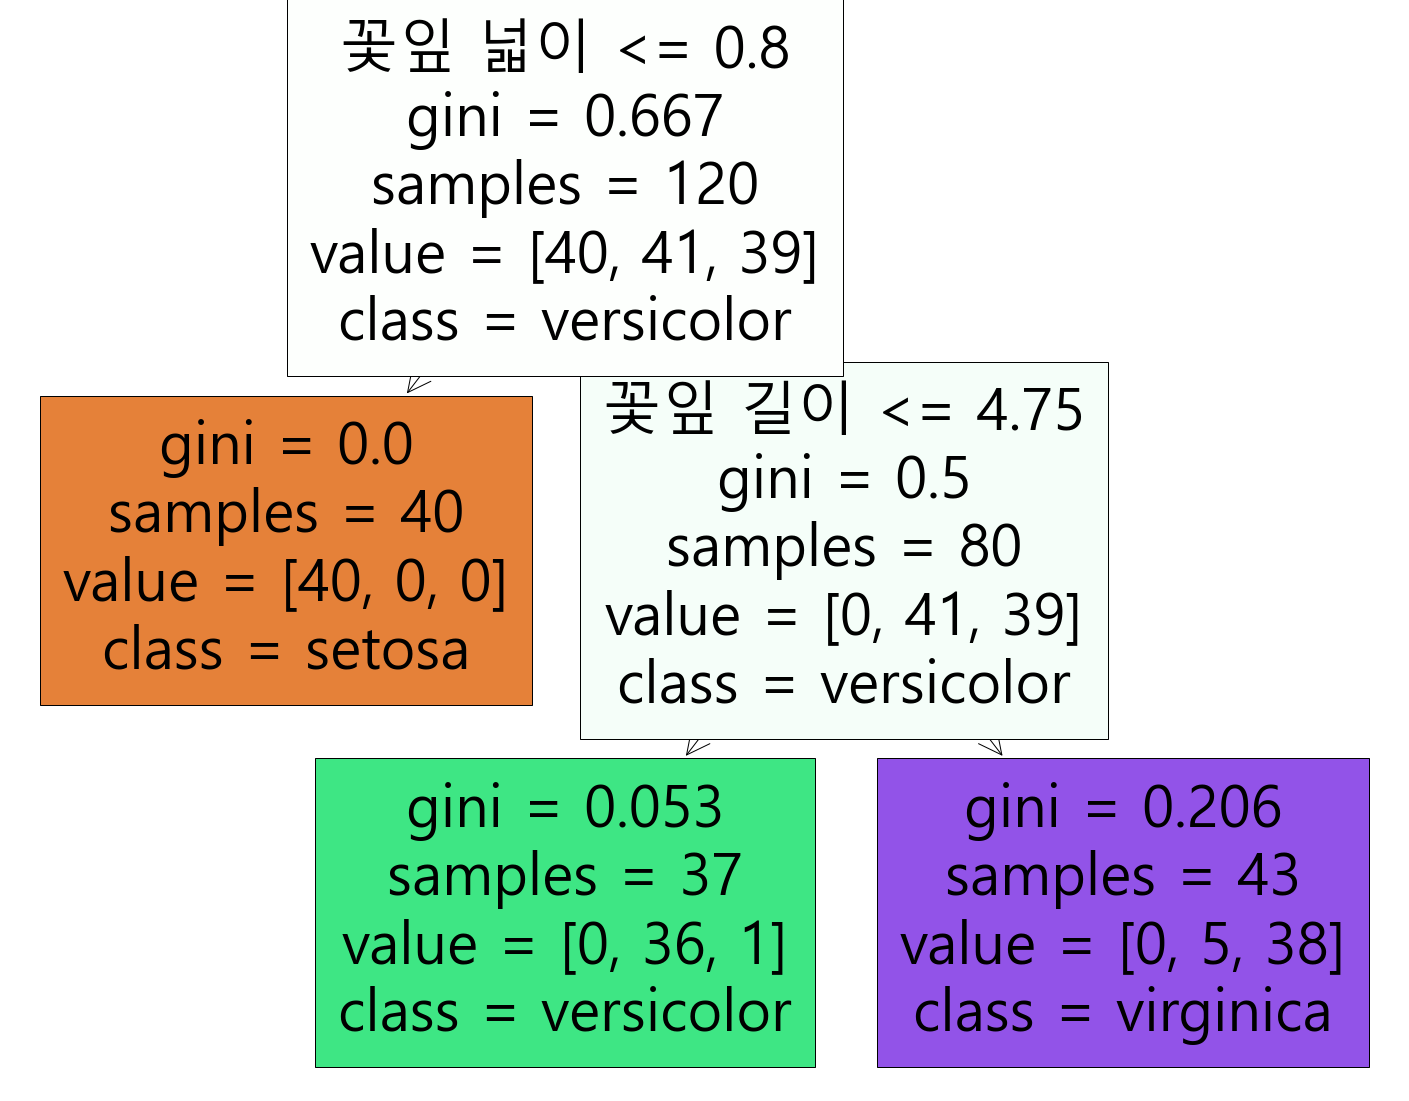

In [23]:
# 학습한 결과 출력
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(25,20))

tree.plot_tree(DTmodel,
              feature_names=['꽃받침 길이', '꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=True)
plt.show()

## 예측하기

In [24]:
# test data로 예측하기
DTmodel.predict(test_X)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [25]:
test_Y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [27]:
# 데이터 불러오기

X, Y = load_breast_cancer(return_X_y=True)
X = np.array(X)
Y = np.array(Y)

In [29]:
len(X)

569

In [33]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [34]:
X.shape

(569, 30)

In [35]:
# 학습용 데이터, 평가용 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)

In [36]:
# 나눠졌는지 확인 
# 평가용 샘플 갯수
len(test_Y)

114

In [37]:
len(test_Y)-sum(test_Y) # 클래스 0인 평가용 샘플

43

In [43]:
sum(test_Y) # 클래스 1인 평가용 샘플

71

In [44]:
# 의사결정나무 모델 초기화 DRmodel 생성한 것!!!
DTmodel = DecisionTreeClassifier()

In [45]:
# 모델학습 시키기
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier()

In [46]:
# 예측하기
y_pred = DTmodel.predict(test_X)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [47]:
test_Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

Confusion Matrix : 
 [[39  4]
 [ 3 68]]


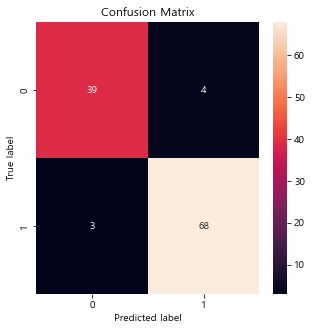

In [51]:
# 혼동행렬(confusion_matrix)

"""
1. 혼동 행렬을 계산합니다
"""
cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력합니다
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("decistion_tree.png")

In [55]:
# 예측한 값 저장
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

# 혼동행렬 계산

cm_train = confusion_matrix(train_Y, y_pred_train)
cm_test = confusion_matrix(test_Y, y_pred_test)

print("train_X confusion_matrix:\n{}".format(cm_train))
print("\ntest_X confusion_matrix:\n{}".format(cm_test))

train_X confusion_matrix:
[[169   0]
 [  0 286]]

test_X confusion_matrix:
[[39  4]
 [ 3 68]]


In [58]:
# 정확도 계산

acc_train = DTmodel.score(train_X, train_Y)
acc_test = DTmodel.score(test_X, test_Y)

# # 정확도를 출력합니다.
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


In [59]:
accuracy_score(test_Y, y_pred)

0.9385964912280702

In [66]:
# 정밀도 계산 True라고 예측한 값 중에 실제 True인 비율
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)

# # 정밀도를 출력합니다.
print('train_X precision: %f' % (precision_train))
print('test_X precision: %f' % (precision_test))

train_X precision: 1.000000
test_X precision: 0.944444


In [65]:
# 재현율 계산 실제 True 값중에 True로 예측한 비율
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)

# # 재현율를 출력합니다.
print('train_X recall: %f' % (recall_train))
print('test_X recall: %f' % (recall_test))

train_X recall: 1.000000
test_X recall: 0.957746


In [68]:
68/71

0.9577464788732394